## Importation des packages

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing 
from sklearn.model_selection import train_test_split


from sklearn.tree import export_graphviz
import pydot

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import scale
import operator

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
 
import graphviz

import shap

c:\Users\elelo\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Algorithme de Random Forest :

In [3]:
def genere_arbre(nb_arbre,profondeur,X_train, Y_train,X_test, Y_test):

    #instanciation
    rf = RandomForestRegressor(n_estimators = nb_arbre, random_state = 42, max_depth=profondeur)

    #training
    rf.fit(X_train,Y_train.values.ravel())
    prediction = rf.predict(X_test)
    Y_test["prevision"]=prediction
    
    # Calculate the mean square errors
    MSE = mean_squared_error(y_true=Y_test["conso_totale_moyenne"],y_pred=Y_test["prevision"])
    MSE_combine = "le RMSE est de " + str(np.sqrt(MSE))
    print(MSE_combine)

    # Calculate the mean absolute error
    MAE = mean_absolute_error(y_true=Y_test["conso_totale_moyenne"],y_pred=Y_test["prevision"])
    MAE_combine = "le MAE est de " + str(np.sqrt(MAE))
    print(MAE_combine)

   
    # Calculate the R2
    r2 = r2_score(y_true=Y_test["conso_totale_moyenne"],y_pred=Y_test["prevision"])
    r2_combine = "le R2 est de " + str(r2)
    print (r2_combine)
  
    return(rf,prediction)

## Random Forest avec les mêmes données que XGBOOST sur IDF

In [4]:
enedis_IDF_like_xgboost=pd.read_csv("Données/data_one_hot_encoded/data_one_hot_encoded_like_xgboost_6kva_IDF.csv")

"Plusieurs solutions existent pour mieux comprendre les décisions. Il est possible d’utiliser des modèles directement interprétables (régression linéaire ou logistique, arbre de décision…), mais ce sont des modèles plus simples qui donnent généralement de moins bons résultats. L’autre approche est d’extraire des informations du modèle afin de comprendre ses prédictions, soit globalement pour expliquer sur quoi se base le modèle pour prédire, soit localement pour expliquer chaque décision."

https://www.aquiladata.fr/insights/interpretabilite-des-modeles-de-machine-learning/


Découpage de nos data en train/test :

In [5]:
enedis_IDF_like_xgboost
enedis_IDF_like_xgboost.dropna(inplace=True)

In [6]:
def decoupe_data_like_xgboost(bdd_region):
 

    X = bdd_region.drop(["conso_totale_moyenne","Horodate"],axis=1)
    Y = bdd_region[["conso_totale_moyenne"]]
    

    split_date = "2022-01-01 00:00:00"
    df_train = bdd_region.loc[bdd_region["Horodate"]< split_date].copy()
    df_test = bdd_region.loc[bdd_region["Horodate"]> split_date].copy()

    

    X_train = df_train.drop(["conso_totale_moyenne",'Horodate'],axis=1)
    Y_train = df_train[["conso_totale_moyenne"]]

    X_test = df_test.drop(["conso_totale_moyenne",'Horodate'],axis=1)
    Y_test = df_test[["conso_totale_moyenne"]]


    return (X,Y, X_train, X_test, Y_train, Y_test)

In [7]:
X_IDF_xg,Y_IDF_xg , X_train_IDF_xg, X_test_IDF_xg, Y_train_IDF_xg, Y_test_IDF_xg =decoupe_data_like_xgboost(enedis_IDF_like_xgboost)

On calibre notre modèle pour trouver la profondeur et le nb d'arbres :

In [8]:
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(RandomForestRegressor(random_state=0), param_grid={'max_depth':[4,6,7,8,9]}, cv = 10).fit(X_train_IDF_xg, Y_train_IDF_xg.values.ravel())
model.best_estimator_ #profondeur = 9

RandomForestRegressor(max_depth=9, random_state=0)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


le RMSE est de 25.647476997813396pour le modèle n = 16
le MAE est de 4.383272753647044pour le modèle n = 16
le R2 est de 0.9103075964816498pour le modèle n = 16


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


le RMSE est de 25.481579016540238pour le modèle n = 32
le MAE est de 4.368952263729483pour le modèle n = 32
le R2 est de 0.9114641753150419pour le modèle n = 32


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


le RMSE est de 25.453245144194845pour le modèle n = 64
le MAE est de 4.365350893774868pour le modèle n = 64
le R2 est de 0.9116609581025605pour le modèle n = 64


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


le RMSE est de 25.38369314188636pour le modèle n = 100
le MAE est de 4.361270724666857pour le modèle n = 100
le R2 est de 0.9121430783693074pour le modèle n = 100


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


le RMSE est de 25.36371596638226pour le modèle n = 200
le MAE est de 4.353922234312994pour le modèle n = 200
le R2 est de 0.912281312193735pour le modèle n = 200


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


le RMSE est de 25.43987388798257pour le modèle n = 400
le MAE est de 4.363115634027245pour le modèle n = 400
le R2 est de 0.9117537473478909pour le modèle n = 400


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


le RMSE est de 25.454728505465145pour le modèle n = 800
le MAE est de 4.363578956961939pour le modèle n = 800
le R2 est de 0.9116506613776444pour le modèle n = 800


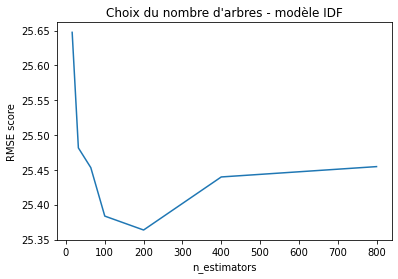

In [9]:
n_estimators = [ 16, 32, 64, 100, 200,400,800]

test_results = []
for estimator in n_estimators:
   rf = RandomForestRegressor(n_estimators=estimator,random_state = 42, max_depth=9)

   rf.fit(X_train_IDF_xg, Y_train_IDF_xg)
   train_pred = rf.predict(X_test_IDF_xg)


   prediction = rf.predict(X_test_IDF_xg)
   Y_test_IDF_xg["prevision"]=prediction
    
   # Calculate the mean square errors
   MSE = mean_squared_error(y_true=Y_test_IDF_xg["conso_totale_moyenne"],y_pred=Y_test_IDF_xg["prevision"])
   MSE_combine = "le RMSE est de " + str(np.sqrt(MSE))+ "pour le modèle n = "+str(estimator)
   print(MSE_combine)
   
   # Calculate the mean absolute error
   MAE = mean_absolute_error(y_true=Y_test_IDF_xg["conso_totale_moyenne"],y_pred=Y_test_IDF_xg["prevision"])
   MAE_combine = "le MAE est de " + str(np.sqrt(MAE))+ "pour le modèle n = "+str(estimator)
   print(MAE_combine)

   # Calculate the R2
   r2 = r2_score(y_true=Y_test_IDF_xg["conso_totale_moyenne"],y_pred=Y_test_IDF_xg["prevision"])
   r2_combine = "le R2 est de " + str(r2) + "pour le modèle n = "+str(estimator)
   print (r2_combine)

   test_results.append(np.sqrt(MSE))

plt.plot(n_estimators, test_results, label='Test R2')

plt.ylabel('RMSE score')
plt.xlabel('n_estimators')
plt.title("Choix du nombre d'arbres - modèle IDF")
plt.show()

  


On génère le modèle :

In [10]:
modele_IDF_xg,predic_IDF_xg=genere_arbre(200,9,X_train_IDF_xg, Y_train_IDF_xg,X_test_IDF_xg,Y_test_IDF_xg)


le RMSE est de 25.36371596638226
le MAE est de 4.353922234312994
le R2 est de 0.912281312193735


On affiche le plot des prédictions :

Text(0.5, 1.0, "Prédiction de la consommation pour l'année 2022 pour la région Île-de-France")

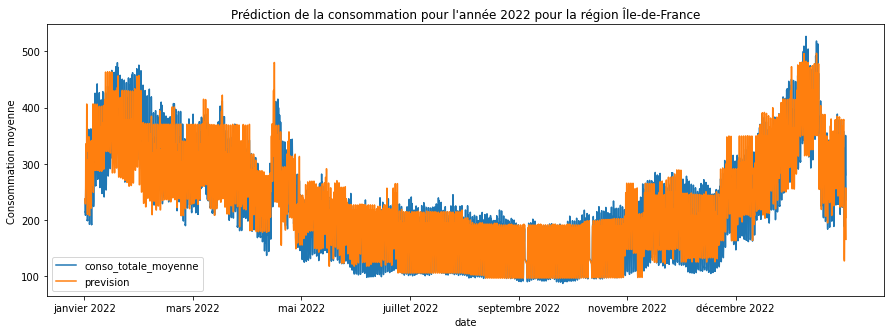

In [30]:
Y_test_IDF_xg[['conso_totale_moyenne','prevision']].plot(figsize=(15, 5))
plt.ylabel('Consommation moyenne ')
plt.xlabel('date')
t2=[17500,20000,22500,25000,27500,30000,32500]
plt.xticks(t2,["janvier 2022","mars 2022","mai 2022","juillet 2022","septembre 2022","novembre 2022","décembre 2022"])
plt.title("Prédiction de la consommation pour l'année 2022 pour la région Île-de-France")

### Importance avec SHAP 

On travaille sur un sous-échantillon des données pour que les calculs soient plus rapides.

SHAP calcule les contributions de chaque variable à cette prédiction

Pour résumer, la méthode SHAP a été conçue comme vérifiant trois propriétés jugées nécessaires afin d’expliquer correctement un modèle :

- Missingness : les variables manquantes n’ont aucun impact
- Consistency : changer le modèle de telle manière qu’une variable a un plus fort impact ne réduira jamais la valeur de contribution de cette variable (permet de comparer les feature importances de différents modèles)
- Local accuracy : la somme des valeurs de contribution des variables est égale à la sortie du modèle

In [14]:
X_train_IDF_sample = X_train_IDF_xg.sample(1000)
X_test_IDF_sample = X_test_IDF_xg.sample(1000)
explainer = shap.TreeExplainer(modele_IDF_xg)
shap_values_IDF_train = explainer.shap_values(X_train_IDF_sample)
shap_values_IDF_test = explainer.shap_values(X_test_IDF_sample)

### Valeurs moyennes


#### Donnnées d'entraînement


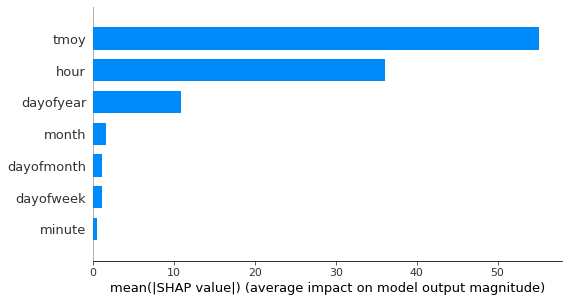

In [15]:
shap.summary_plot(shap_values_IDF_train, X_train_IDF_sample, plot_type="bar")

### Données de test

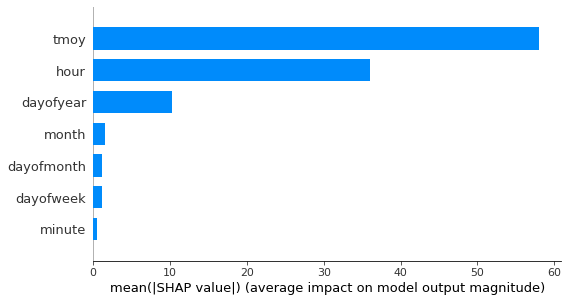

In [16]:
shap.summary_plot(shap_values_IDF_test, X_test_IDF_sample, plot_type="bar")

In [17]:
# pour pouvoir utiliser les indexation avec Pandas
shap_values_train_ = pd.DataFrame(shap_values_IDF_train, index=X_train_IDF_sample.index)
shap_values_val_ = pd.DataFrame(shap_values_IDF_test, index=X_test_IDF_sample.index) 


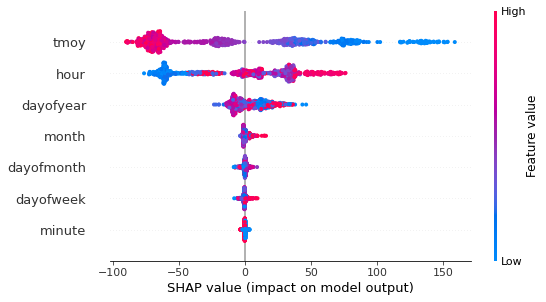

In [18]:
shap.summary_plot(shap_values_IDF_test, X_test_IDF_sample)

Sur ce graphique, on comprend donc qu’une température faible mène à une consommation électrique élevée (car une valeur SHAP faible, donc la consommation est plus forte), alors que plus il est tard en journée, plus les foyers consomment. Les résultats sont plus difficiles à interpréter pour le jour de l'année.

## Random Forest avec les mêmes données que XGBOOST sur HDF

In [12]:
enedis_HDF_like_xgboost=pd.read_csv("Données/data_one_hot_encoded/data_one_hot_encoded_like_xgboost_6kva_HDF.csv")
enedis_HDF_like_xgboost.dropna(inplace=True)

In [13]:
X_HDF_xg,Y_HDF_xg , X_train_HDF_xg, X_test_HDF_xg, Y_train_HDF_xg, Y_test_HDF_xg =decoupe_data_like_xgboost(enedis_HDF_like_xgboost)

On calibre notre modèle pour trouver la profondeur et le nb d'arbres :

In [14]:
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(RandomForestRegressor(random_state=0), param_grid={'max_depth':[4,6,7,8,9]}, cv = 10).fit(X_train_HDF_xg, Y_train_HDF_xg.values.ravel())
model.best_estimator_ #profondeur = 9

RandomForestRegressor(max_depth=9, random_state=0)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


le RMSE est de 33.51152550522913pour le modèle n = 16
le MAE est de 4.987665179575738pour le modèle n = 16
le R2 est de 0.8986277229917882pour le modèle n = 16


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


le RMSE est de 33.30198691325933pour le modèle n = 32
le MAE est de 4.971237021089135pour le modèle n = 32
le R2 est de 0.899891467059818pour le modèle n = 32


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


le RMSE est de 33.07638896376646pour le modèle n = 64
le MAE est de 4.95321005696195pour le modèle n = 64
le R2 est de 0.9012432052231845pour le modèle n = 64


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


le RMSE est de 33.04559516801316pour le modèle n = 100
le MAE est de 4.953965721156814pour le modèle n = 100
le R2 est de 0.9014270028532888pour le modèle n = 100


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


le RMSE est de 33.04973173544315pour le modèle n = 200
le MAE est de 4.954199525341098pour le modèle n = 200
le R2 est de 0.9014023230514442pour le modèle n = 200


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


le RMSE est de 33.03664936687424pour le modèle n = 400
le MAE est de 4.956566966883766pour le modèle n = 400
le R2 est de 0.9014803651890128pour le modèle n = 400


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


le RMSE est de 33.04996047061676pour le modèle n = 800
le MAE est de 4.960476688477479pour le modèle n = 800
le R2 est de 0.9014009582697281pour le modèle n = 800


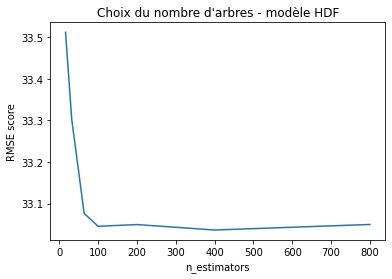

In [15]:
n_estimators = [ 16, 32, 64, 100, 200,400,800]

test_results = []
for estimator in n_estimators:
   rf = RandomForestRegressor(n_estimators=estimator,random_state = 42, max_depth=9)

   rf.fit(X_train_IDF_xg, Y_train_HDF_xg)
   train_pred = rf.predict(X_test_HDF_xg)


   prediction = rf.predict(X_test_HDF_xg)
   Y_test_HDF_xg["prevision"]=prediction
    
   # Calculate the mean square errors
   MSE = mean_squared_error(y_true=Y_test_HDF_xg["conso_totale_moyenne"],y_pred=Y_test_HDF_xg["prevision"])
   MSE_combine = "le RMSE est de " + str(np.sqrt(MSE))+ "pour le modèle n = "+str(estimator)
   print(MSE_combine)
   
   # Calculate the mean absolute error
   MAE = mean_absolute_error(y_true=Y_test_HDF_xg["conso_totale_moyenne"],y_pred=Y_test_HDF_xg["prevision"])
   MAE_combine = "le MAE est de " + str(np.sqrt(MAE))+ "pour le modèle n = "+str(estimator)
   print(MAE_combine)

   # Calculate the R2
   r2 = r2_score(y_true=Y_test_HDF_xg["conso_totale_moyenne"],y_pred=Y_test_HDF_xg["prevision"])
   r2_combine = "le R2 est de " + str(r2) + "pour le modèle n = "+str(estimator)
   print (r2_combine)

   test_results.append(np.sqrt(MSE))

plt.plot(n_estimators, test_results, label='Test R2')

plt.ylabel('RMSE score')
plt.xlabel('n_estimators')
plt.title("Choix du nombre d'arbres - modèle HDF")
plt.show()

  


On génère le modèle :

In [16]:
modele_HDF_xg,predic_HDF_xg=genere_arbre(100,9,X_train_HDF_xg, Y_train_HDF_xg,X_test_HDF_xg,Y_test_HDF_xg)


le RMSE est de 31.90082422407303
le MAE est de 4.886136761501736
le R2 est de 0.9081382713796965


On affiche le plot des prédictions :

Text(0.5, 1.0, "Prédiction de la consommation pour l'année 2022 pour la région Haut-de-France")

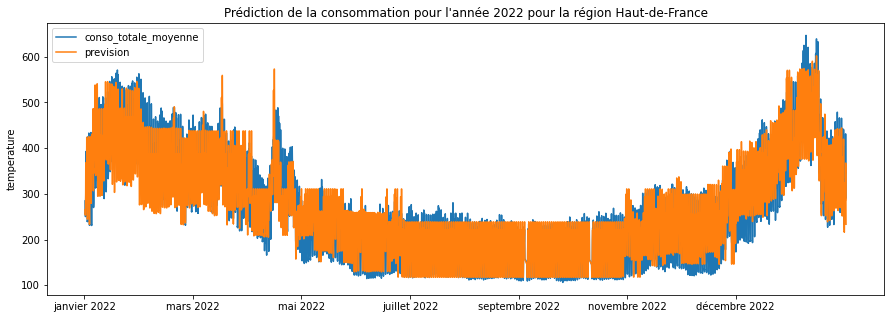

In [17]:
Y_test_HDF_xg[['conso_totale_moyenne','prevision']].plot(figsize=(15, 5))
plt.ylabel('Consommation moyenne ')
plt.ylabel('temperature')
t2=[17500,20000,22500,25000,27500,30000,32500]
plt.xticks(t2,["janvier 2022","mars 2022","mai 2022","juillet 2022","septembre 2022","novembre 2022","décembre 2022"])
plt.title("Prédiction de la consommation pour l'année 2022 pour la région Haut-de-France")

### Importance avec SHAP 

In [164]:
X_train_HDF_sample = X_train_HDF_xg.sample(1000)
X_test_HDF_sample = X_test_HDF_xg.sample(1000)
explainer_HDF = shap.TreeExplainer(modele_HDF_xg)
shap_values_HDF_train = explainer.shap_values(X_train_HDF_sample)
shap_values_HDF_test = explainer.shap_values(X_test_HDF_sample)

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. Consider retrying with the feature_perturbation='interventional' option. This check failed because for one of the samples the sum of the SHAP values was 360.591046, while the model output was 336.211544. If this difference is acceptable you can set check_additivity=False to disable this check.

### Valeurs moyennes


#### Donnnées d'entraînement


In [ ]:
shap.summary_plot(shap_values_IDF_train, X_train_IDF_sample, plot_type="bar")

### Données de test

In [ ]:
shap.summary_plot(shap_values_IDF_test, X_test_IDF_sample, plot_type="bar")

In [ ]:
# pour pouvoir utiliser les indexation avec Pandas
shap_values_train_ = pd.DataFrame(shap_values_IDF_train, index=X_train_IDF_sample.index)
shap_values_val_ = pd.DataFrame(shap_values_IDF_test, index=X_test_IDF_sample.index) 


In [ ]:
shap.summary_plot(shap_values_IDF_test, X_test_IDF_sample)

## Random Forest avec les mêmes données que XGBOOST sur PACA

In [18]:
enedis_paca_like_xgboost=pd.read_csv("Données/data_one_hot_encoded/data_one_hot_encoded_like_xgboost_6kva_PACA.csv")
enedis_paca_like_xgboost.dropna(inplace=True)

In [19]:
X_PACA_xg,Y_PACA_xg , X_train_PACA_xg, X_test_PACA_xg, Y_train_PACA_xg, Y_test_PACA_xg =decoupe_data_like_xgboost(enedis_paca_like_xgboost)

On calibre notre modèle pour trouver la profondeur et le nb d'arbres :

In [20]:
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(RandomForestRegressor(random_state=0), param_grid={'max_depth':[4,6,7,8,9]}, cv = 10).fit(X_train_PACA_xg, Y_train_PACA_xg.values.ravel())
model.best_estimator_ #profondeur = 9

RandomForestRegressor(max_depth=9, random_state=0)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


le RMSE est de 33.2246505905191pour le modèle n = 16
le MAE est de 5.132574471145855pour le modèle n = 16
le R2 est de 0.8592100601976813pour le modèle n = 16


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


le RMSE est de 32.990137554165194pour le modèle n = 32
le MAE est de 5.115577975412251pour le modèle n = 32
le R2 est de 0.8611905506913349pour le modèle n = 32


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


le RMSE est de 32.886876668359434pour le modèle n = 64
le MAE est de 5.1068416192298445pour le modèle n = 64
le R2 est de 0.8620581526663698pour le modèle n = 64


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


le RMSE est de 32.82882222278293pour le modèle n = 100
le MAE est de 5.102721668192999pour le modèle n = 100
le R2 est de 0.8625447339406676pour le modèle n = 100


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


le RMSE est de 32.751505894639pour le modèle n = 200
le MAE est de 5.096434532264064pour le modèle n = 200
le R2 est de 0.8631914231053874pour le modèle n = 200


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


le RMSE est de 32.76640386226261pour le modèle n = 400
le MAE est de 5.097175921090949pour le modèle n = 400
le R2 est de 0.8630669321390221pour le modèle n = 400


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


le RMSE est de 32.768561791815884pour le modèle n = 800
le MAE est de 5.097029507587526pour le modèle n = 800
le R2 est de 0.863048895271415pour le modèle n = 800


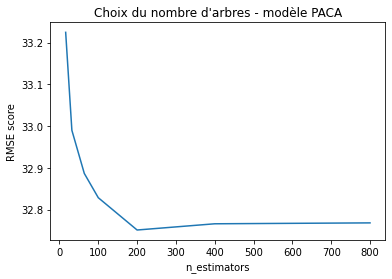

In [21]:
n_estimators = [ 16, 32, 64, 100, 200,400,800]

test_results = []
for estimator in n_estimators:
   rf = RandomForestRegressor(n_estimators=estimator,random_state = 42, max_depth=9)

   rf.fit(X_train_PACA_xg, Y_train_PACA_xg)
   train_pred = rf.predict(X_test_PACA_xg)


   prediction = rf.predict(X_test_PACA_xg)
   Y_test_PACA_xg["prevision"]=prediction
    
   # Calculate the mean square errors
   MSE = mean_squared_error(y_true=Y_test_PACA_xg["conso_totale_moyenne"],y_pred=Y_test_PACA_xg["prevision"])
   MSE_combine = "le RMSE est de " + str(np.sqrt(MSE))+ "pour le modèle n = "+str(estimator)
   print(MSE_combine)
   
   # Calculate the mean absolute error
   MAE = mean_absolute_error(y_true=Y_test_PACA_xg["conso_totale_moyenne"],y_pred=Y_test_PACA_xg["prevision"])
   MAE_combine = "le MAE est de " + str(np.sqrt(MAE))+ "pour le modèle n = "+str(estimator)
   print(MAE_combine)

   # Calculate the R2
   r2 = r2_score(y_true=Y_test_PACA_xg["conso_totale_moyenne"],y_pred=Y_test_PACA_xg["prevision"])
   r2_combine = "le R2 est de " + str(r2) + "pour le modèle n = "+str(estimator)
   print (r2_combine)

   test_results.append(np.sqrt(MSE))

plt.plot(n_estimators, test_results, label='Test R2')

plt.ylabel('RMSE score')
plt.xlabel('n_estimators')
plt.title("Choix du nombre d'arbres - modèle PACA")
plt.show()

  


On génère le modèle :

In [22]:
modele_PACA_xg,predic_PACA_xg=genere_arbre(200,9,X_train_PACA_xg, Y_train_PACA_xg,X_test_PACA_xg,Y_test_PACA_xg)


le RMSE est de 32.751505894639
le MAE est de 5.096434532264064
le R2 est de 0.8631914231053874


On affiche le plot des prédictions :

Text(0.5, 1.0, "Prédiction de la consommation pour l'année 2022")

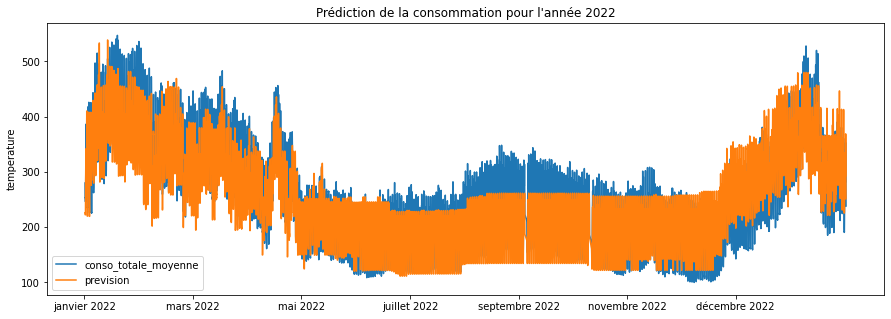

In [23]:
Y_test_PACA_xg[['conso_totale_moyenne','prevision']].plot(figsize=(15, 5))
plt.ylabel('Consommation moyenne ')
plt.ylabel('temperature')
t2=[17500,20000,22500,25000,27500,30000,32500]
plt.xticks(t2,["janvier 2022","mars 2022","mai 2022","juillet 2022","septembre 2022","novembre 2022","décembre 2022"])
plt.title("Prédiction de la consommation pour l'année 2022")

### Importance avec SHAP 

In [174]:
X_train_PACA_sample = X_train_PACA_xg.sample(1000)
X_test_PACA_sample = X_test_PACA_xg.sample(1000)
explainer = shap.TreeExplainer(modele_PACA_xg)
shap_values_PACA_train = explainer.shap_values(X_train_PACA_sample)
shap_values_PACA_test = explainer.shap_values(X_test_PACA_sample)

### Valeurs moyennes


#### Donnnées d'entraînement


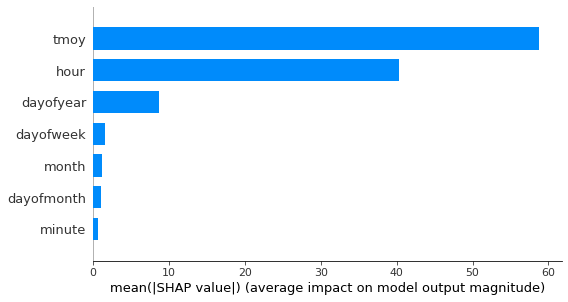

In [176]:
shap.summary_plot(shap_values_PACA_train, X_train_PACA_sample, plot_type="bar")

### Données de test

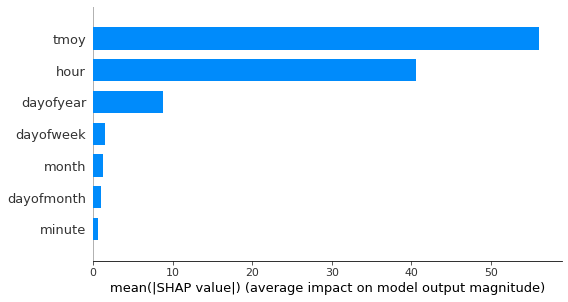

In [178]:
shap.summary_plot(shap_values_PACA_test, X_test_PACA_sample, plot_type="bar")

In [180]:
# pour pouvoir utiliser les indexation avec Pandas
shap_values_train_ = pd.DataFrame(shap_values_PACA_train, index=X_train_PACA_sample.index)
shap_values_val_ = pd.DataFrame(shap_values_PACA_test, index=X_test_PACA_sample.index) 


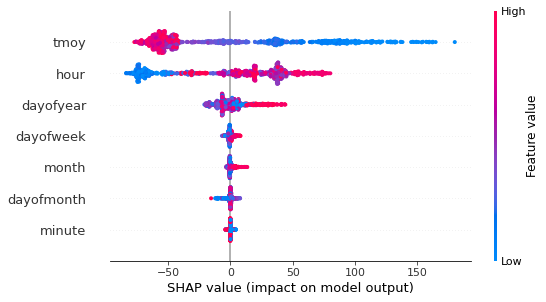

In [181]:
shap.summary_plot(shap_values_PACA_test, X_test_PACA_sample)

## Random Forest sur toutes les régions :

### Création de la bdd avec toutes les régions regroupées :

In [67]:
def read_reg_and_modif_bdd(region):
    enedis_region=pd.read_csv("Données/data_one_hot_encoded/data_one_hot_encoded_like_xgboost_6kva_"+region+".csv",sep=",")
    enedis_region.dropna(inplace=True)

    enedis_region["region"]=region

    return enedis_region

In [68]:
enedis_IDF = read_reg_and_modif_bdd("IDF")
enedis_PACA = read_reg_and_modif_bdd("PACA")
enedis_ARA = read_reg_and_modif_bdd("ARA")
enedis_GE = read_reg_and_modif_bdd("GE")
enedis_BFC = read_reg_and_modif_bdd("BFC")
enedis_CVL = read_reg_and_modif_bdd("CVL")
enedis_OCCITANIE = read_reg_and_modif_bdd("OCCITANIE")
enedis_BRETAGNE = read_reg_and_modif_bdd("BRETAGNE")
enedis_NA = read_reg_and_modif_bdd("NA")
enedis_HDF = read_reg_and_modif_bdd("HDF")
enedis_PDL = read_reg_and_modif_bdd("PDL")
enedis_NORMANDIE = read_reg_and_modif_bdd("NORMANDIE")



In [93]:
enedis_final=pd.concat([enedis_IDF,enedis_HDF,enedis_PACA,enedis_BRETAGNE,enedis_BFC,enedis_GE,enedis_OCCITANIE,enedis_NORMANDIE,enedis_PDL,enedis_NA,enedis_ARA,enedis_CVL])

In [95]:
# Créer un dictionnaire de correspondance entre chaque catégorie et un entier unique
region_dict = {region: i for i, region in enumerate(enedis_final['region'].unique())}

# Appliquer la transformation à la colonne "catégorie"
enedis_final['region_encoded'] = enedis_final['region'].map(region_dict)


In [96]:
enedis_final.sort_values("Horodate",inplace=True)

### Création du modèle :

Découpage en BDD test/train :

In [97]:
def decoupe_data_like_xgboost(bdd_region):
 


    split_date = "2022-01-01 00:00:00"
    df_train = bdd_region.loc[bdd_region["Horodate"]< split_date].copy()
    df_test = bdd_region.loc[bdd_region["Horodate"]> split_date].copy()

    

    X_train = df_train.drop(["conso_totale_moyenne",'Horodate',"region"],axis=1)
    Y_train = df_train[["conso_totale_moyenne"]]

    X_test = df_test.drop(["conso_totale_moyenne","Horodate",'region'],axis=1)
    Y_test = df_test[["conso_totale_moyenne"]]


    return (df_train,df_test, X_train, X_test, Y_train, Y_test)

In [98]:
train_xg,test_xg , X_train_xg, X_test_xg, Y_train_xg, Y_test_xg =decoupe_data_like_xgboost(enedis_final)

On calibre le modèle pour trouver la profondeur et les nb d'arbres :

In [ ]:
from sklearn.model_selection import GridSearchCV

model = GridSearchCV(RandomForestRegressor(random_state=0), param_grid={'max_depth':[4,6,7,8,9]}, cv = 10).fit(X_train_xg, Y_train_xg.values.ravel())
model.best_estimator_ #profondeur = 9

In [ ]:
n_estimators = [ 16, 32, 64, 100, 200,400,800]

test_results = []
for estimator in n_estimators:
   rf = RandomForestRegressor(n_estimators=estimator,random_state = 42, max_depth=9)

   rf.fit(X_train_xg, Y_train_xg)
   train_pred = rf.predict(X_test_xg)


   prediction = rf.predict(X_test_xg)
   Y_test_xg["prevision"]=prediction
    
   # Calculate the mean square errors
   MSE = mean_squared_error(y_true=Y_test_xg["conso_totale_moyenne"],y_pred=Y_test_xg["prevision"])
   MSE_combine = "le RMSE est de " + str(np.sqrt(MSE))+ "pour le modèle n = "+str(estimator)
   print(MSE_combine)
   
   # Calculate the mean absolute error
   MAE = mean_absolute_error(y_true=Y_test_xg["conso_totale_moyenne"],y_pred=Y_test_xg["prevision"])
   MAE_combine = "le MAE est de " + str(np.sqrt(MAE))+ "pour le modèle n = "+str(estimator)
   print(MAE_combine)

   # Calculate the R2
   r2 = r2_score(y_true=Y_test_xg["conso_totale_moyenne"],y_pred=Y_test_xg["prevision"])
   r2_combine = "le R2 est de " + str(r2) + "pour le modèle n = "+str(estimator)
   print (r2_combine)

   test_results.append(np.sqrt(MSE))

plt.plot(n_estimators, test_results, label='Test R2')

plt.ylabel('RMSE score')
plt.xlabel('n_estimators')
plt.show()

  


On génère le modèle avec les bon hyper paramètres :

In [101]:
modele_xg,predic_xg=genere_arbre(64,9,X_train_xg, Y_train_xg,X_test_xg,Y_test_xg)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


le RMSE est de 36.46295130808878
le MAE est de 5.316724202726427
le R2 est de 0.8640903639556782


On affiche le grpahique des prédictions:

Text(0.5, 1.0, "Prédiction de la consommation pour l'année 2022")

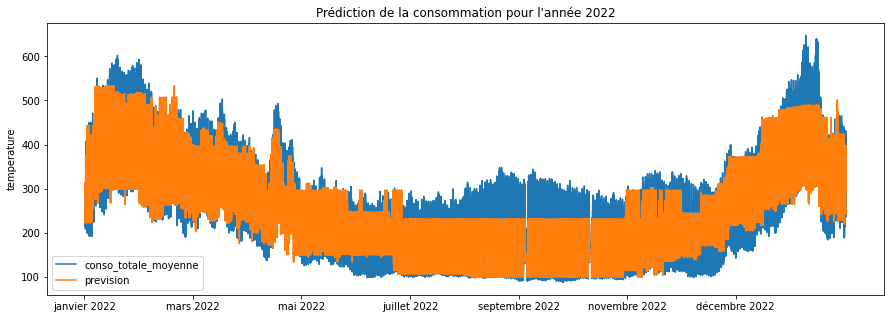

In [102]:
Y_test_xg[['conso_totale_moyenne','prevision']].plot(figsize=(15, 5))
plt.ylabel('Consommation moyenne ')
plt.ylabel('temperature')
t2=[17500,20000,22500,25000,27500,30000,32500]
plt.xticks(t2,["janvier 2022","mars 2022","mai 2022","juillet 2022","septembre 2022","novembre 2022","décembre 2022"])
plt.title("Prédiction de la consommation pour l'année 2022")

## Importance des variables avec SHAP :

In [103]:
X_train_sample = X_train_xg.sample(1000)
X_test_sample = X_test_xg.sample(1000)
explainer = shap.TreeExplainer(modele_xg)
shap_values_train = explainer.shap_values(X_train_sample)
shap_values_test = explainer.shap_values(X_test_sample)

Données d'entraînement :

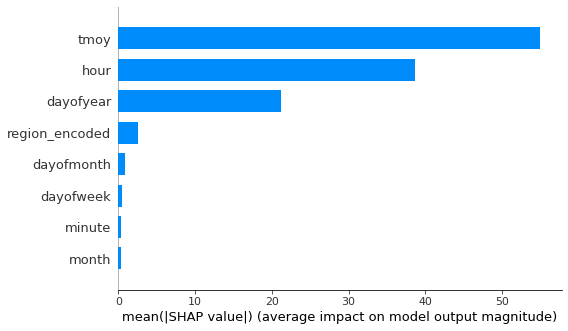

In [104]:
shap.summary_plot(shap_values_train, X_train_sample, plot_type="bar")

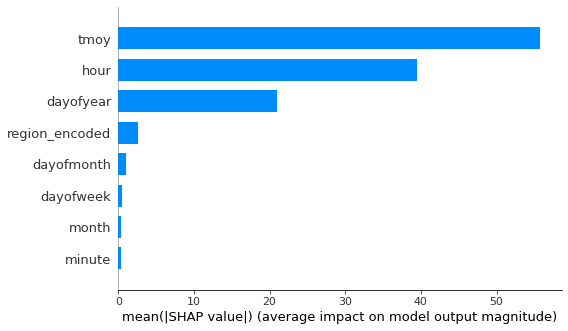

In [105]:
shap.summary_plot(shap_values_test, X_test_sample, plot_type="bar")

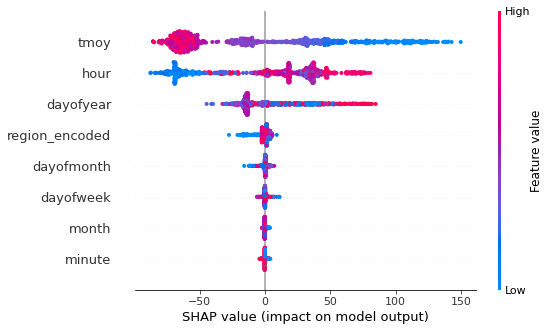

In [106]:
# pour pouvoir utiliser les indexation avec Pandas
shap_values_train_ = pd.DataFrame(shap_values_train, index=X_train_sample.index)
shap_values_val_ = pd.DataFrame(shap_values_test, index=X_test_sample.index) 
shap.summary_plot(shap_values_test, X_test_sample)

high values of the tmoy variable have a high negative contribution on the prediction, while low values have a high positive contribution.  

high values of the hour variable have a high positive contribution on the prediction, while low values have a high negative contribution.